In [1]:
from google.colab import files
uploaded = files.upload()

Saving communities-crime-clean.csv to communities-crime-clean.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('communities-crime-clean.csv')
#used to read csv files and perform operations on it

df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,0.02,1.0,0.46,0.77,0.23,0.38,0.22,0.16,0.22,0.42,0.29,0.29,0.27,0.16,0.24,0.38,0.26,0.01,0.14,0.27,0.37,0.39,0.12,0.69,0.27,0.37,0.32,...,0.01,0.17,0.21,0.65,0.64,0.56,0.82,0.10,0.22,0.5,0.01,0.85,0.82,0.00,0.26,0.83,0.13,0.66,0.16,0.15,0.13,0.13,0.23,0.25,0.28,0.19,0.18,0.25,0.00,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,0.00,0.0,0.15,0.33,0.13,0.27,0.65,0.41,0.45,0.21,0.22,0.29,0.15,0.00,0.29,0.00,0.14,0.02,0.45,0.57,0.70,0.21,0.27,0.43,1.00,0.17,0.93,...,0.02,0.19,0.18,0.43,0.43,0.42,0.58,0.17,0.46,0.5,0.02,0.73,0.58,0.18,0.40,0.56,0.55,0.48,0.06,0.06,0.08,0.02,0.07,0.08,0.09,0.20,0.16,0.36,0.00,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,0.04,1.0,0.12,0.32,0.19,0.28,0.67,0.52,0.57,0.18,0.21,0.35,0.15,0.26,0.18,0.84,0.33,0.06,0.65,0.48,0.58,0.28,0.79,0.22,0.44,0.43,0.54,...,0.02,0.25,0.22,0.36,0.34,0.41,0.50,0.13,0.51,0.5,0.07,0.56,0.52,0.31,0.60,0.40,0.55,0.33,0.05,0.07,0.09,0.02,0.09,0.13,0.13,0.41,0.38,0.47,0.01,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,0.00,0.0,0.23,0.43,0.48,0.36,0.53,0.41,0.44,0.29,0.27,0.30,0.18,0.19,0.20,0.00,0.80,0.02,0.38,0.51,0.59,0.32,0.37,0.43,0.64,0.30,0.52,...,0.02,0.19,0.18,0.38,0.43,0.32,0.58,0.12,0.45,0.5,0.03,0.66,0.55,0.18,0.26,0.58,0.42,0.41,0.10,0.10,0.12,0.08,0.14,0.15,0.15,0.24,0.17,0.33,0.00,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,0.05,1.0,0.02,0.77,0.57,0.47,0.13,0.11,0.16,0.32,0.17,0.19,0.16,0.07,0.21,0.14,0.22,0.11,1.00,0.18,0.18,0.82,0.42,0.23,0.19,1.00,0.25,...,0.05,0.14,0.07,0.25,0.41,0.22,0.24,0.14,0.71,0.0,0.06,0.66,0.21,0.07,0.24,0.77,0.27,0.10,0.16,0.16,0.18,0.18,0.21,0.26,0.21,1.00,0.16,0.24,0.00,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


#HANDLING CATEGORICAL DATA

In [4]:
df.drop(df.columns[[2]], axis=1, inplace=True)

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[0 6 0.01 ... 0.06 0.01 0.0]
 [0 12 0.01 ... 0.03 0.01 0.0]
 [0 37 0.03 ... 0.11 0.04 0.0]
 ...
 [45 810 0.03 ... 0.2 0.02 0.0]
 [45 1356 0.01 ... 0.09 0.32 0.0]
 [45 1474 0.01 ... 0.15 0.0 0.0]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [6]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [8]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.08888889 0.03671233 0.         ... 0.14       0.02       0.        ]
 [0.55555556 0.53972603 0.01       ... 0.17       0.98       0.        ]
 [0.         0.80547945 0.         ... 0.13       0.01       0.        ]
 ...
 [0.66666667 0.84109589 0.1        ... 0.3        0.06       0.61      ]
 [0.73333333 0.95342466 0.         ... 0.06       0.02       0.        ]
 [0.42222222 0.9830137  0.02       ... 0.28       0.49       0.        ]]
[[0.04444444 0.43726027 0.02       ... 0.05       0.02       0.        ]
 [0.42222222 0.09369863 0.04       ... 0.2        0.44       0.        ]
 [0.97777778 0.03178082 0.01       ... 0.13       0.03       0.        ]
 ...
 [0.2        0.91452055 0.01       ... 0.13       0.         0.        ]
 [0.37777778 0.45534247 0.05       ... 0.1        0.05       0.        ]
 [0.93333333 0.08986301 0.         ... 0.19       0.38       0.        ]]


#GRAPHS

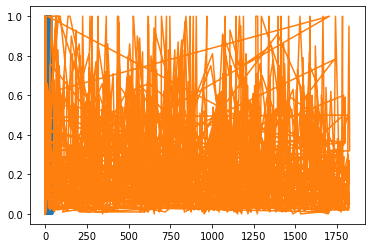

In [9]:
import matplotlib.pyplot as plt 

plt.plot(x, y) 
 

plt.show() 


#ALGORITHM

In [10]:
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)


#FITTING OF TRAINING DATA

In [11]:
km.fit(x_train,y_train)
#training or fitting the train data into the model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [12]:
predictions = km.predict(x_test)

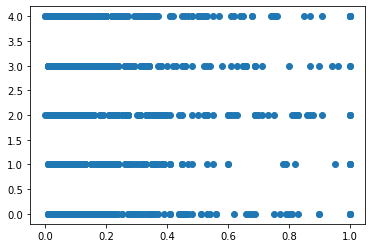

In [13]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

#EVALUATION

In [14]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.826077694235589
MSE: 4.9427642857142855
RMSE: 2.2232328455909167


In [27]:

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1
print(metrics.accuracy_score(y_train_classes, y_pred_classes))

0.22180451127819548


#SAVING THE MODEL USING PICKLE LIBRARY

In [17]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(km) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([2, 0, 0, 0, 2, 2, 3, 2, 2, 3, 0, 3, 1, 2, 1, 3, 1, 3, 1, 4, 4, 4,
       2, 2, 0, 0, 4, 3, 4, 2, 3, 1, 1, 2, 2, 2, 1, 2, 1, 3, 0, 2, 2, 1,
       1, 2, 0, 4, 1, 4, 0, 0, 1, 2, 4, 1, 3, 2, 4, 4, 4, 1, 3, 2, 3, 1,
       1, 1, 2, 4, 0, 0, 0, 4, 3, 0, 1, 1, 1, 2, 0, 2, 3, 1, 1, 4, 0, 4,
       2, 3, 2, 3, 0, 0, 2, 3, 0, 0, 3, 4, 2, 4, 3, 2, 2, 1, 2, 4, 3, 0,
       2, 3, 1, 3, 0, 2, 4, 0, 2, 0, 1, 1, 1, 3, 3, 2, 1, 4, 4, 3, 1, 2,
       4, 1, 4, 1, 0, 4, 3, 2, 3, 3, 4, 4, 4, 3, 3, 4, 4, 0, 1, 3, 0, 0,
       3, 2, 3, 0, 2, 0, 1, 2, 2, 4, 2, 0, 2, 0, 3, 0, 1, 2, 2, 2, 4, 2,
       2, 2, 2, 1, 1, 3, 2, 3, 0, 3, 0, 3, 4, 0, 1, 4, 0, 3, 3, 4, 2, 1,
       2, 2, 0, 4, 1, 1, 2, 0, 2, 0, 3, 4, 1, 3, 1, 1, 3, 0, 3, 1, 1, 3,
       0, 0, 4, 4, 0, 3, 1, 1, 2, 1, 0, 0, 3, 0, 2, 0, 2, 4, 4, 3, 1, 4,
       0, 2, 3, 3, 2, 0, 3, 2, 2, 3, 0, 3, 0, 1, 4, 3, 2, 4, 1, 2, 0, 1,
       4, 2, 3, 1, 0, 3, 2, 2, 3, 3, 4, 2, 4, 4, 2, 4, 1, 3, 1, 2, 1, 4,
       1, 4, 3, 2, 3, 3, 1, 2, 4, 3, 2, 0, 2, 0, 1,

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [21]:
predictions=predictions[0:798]
from sklearn.metrics import confusion_matrix

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

IndexError: ignored

Precision, Recall, Support, Fscore

In [23]:
y_train=y_train[0:798]
import numpy
from sklearn.metrics import precision_recall_fscore_support
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(0.496363166628576, 0.48665791776028, 0.20349168947687346, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[145 598]
 [ 12  43]]


Precision, Recall, Support, Fscore

In [25]:
import numpy
from sklearn.metrics import precision_recall_fscore_support
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(0.495324781144112, 0.48848647987275173, 0.2228927203065134, None)